In [36]:
import sys
sys.path.extend(['..', '../bprime'])
    
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

from bprime.theory import bgs_segment, bgs_rec

## Comparison of BGS Theory functions

This is a quick check to make sure the functions in the `theory.py` module are aligning up. `bgs_rec()` is the traditional BGS function from McVicker et al (2009) and Elyashiv et al. (2016). Traditionally it's exponent is summed; in the `notebooks/BGS_model_notes.nb` I work through integrating along the segment's length, but partitioning recombination into a fixed `rf` (sometimes in code elsewhere, `recfrac`) part away and a per-basepair recombination along the segment `rbp`. This below shows this all aligns up:

In [38]:
mu = 1e-7
s = 1e-2
r = 1e-8
L = 1000

bgs_rec(mu, s, r, L), bgs_segment(mu, s, 1e-8, 0, L)

(array(0.99004985), array(0.99004985))

In [49]:
@np.vectorize
def integrated_bgs_rec(mu, s, rf, rbp, L):
    """
    Integrate over the segment's length numerically -- should 
    match bgs_segment().
    """
    def bgs(x):
        return bgs_rec(mu, s, rf + rbp*x, 1, log=True)
    return np.exp(quad(bgs, 0, L)[0])

integrated_bgs_rec(mu, s, 0, r, L), bgs_segment(mu, s, 0, r, L)

(array(0.99005963), array(0.99005963))

Text(0, 0.5, 'B')

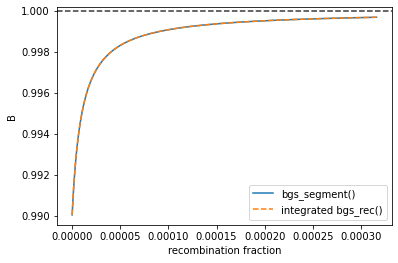

In [55]:
rf = np.logspace(-8, -3.5, 100)
fig, ax = plt.subplots()
ax.plot(rf, bgs_segment(mu, s, 1e-8, rf, L), label='bgs_segment()')
ax.plot(rf, integrated_bgs_rec(mu, s, 1e-8, rf, L), linestyle='dashed', label='integrated bgs_rec()')
ax.legend()
ax.axhline(1, linestyle='dashed', c='0.22')
ax.set_xlabel("recombination fraction")
ax.set_ylabel("B")